In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Load diabetes dataset
data = pd.read_excel("ML470_S2_Diabetes_Data_Concept.xlsx")

# Display first few rows
data.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,FamilyHistory,HbA1c,Outcome
0,148,72,35,0,33.6,0.627,50,0,11,1
1,85,66,29,0,26.6,0.351,31,0,5,0
2,183,64,0,0,23.3,0.672,32,1,11,1
3,89,66,23,94,28.1,0.167,21,1,5,0
4,137,40,35,168,43.1,2.288,33,0,8,1


In [14]:
def assess_outliers(data, title):
    features = ['Glucose', 'BMI', 'Age', 'Insulin']
    
    plt.figure(figsize=(12, 5))
    sns.boxplot(data=data[features])
    plt.title(title, fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Visualization 1: Before Outlier Treatment


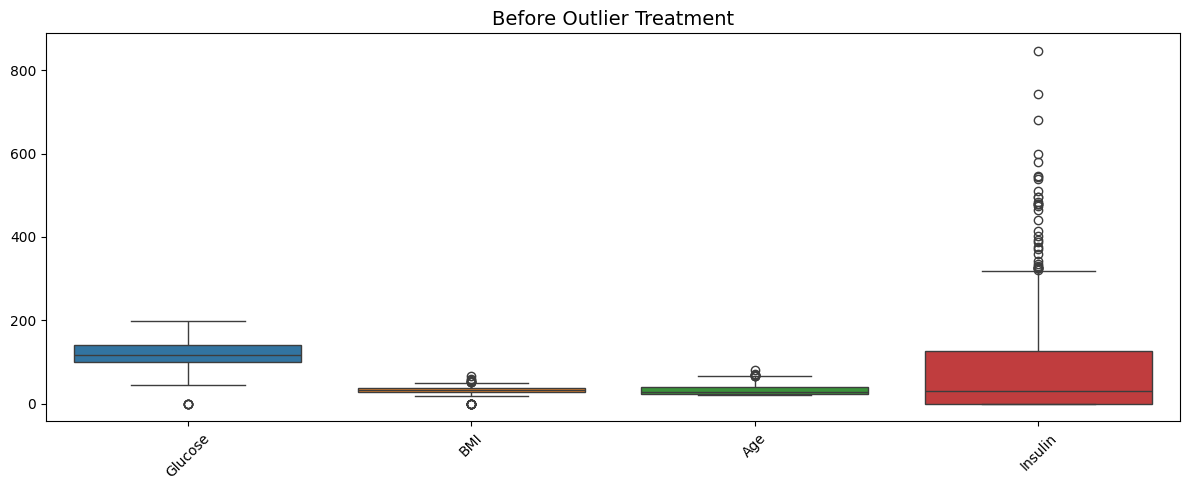

In [15]:
print("Visualization 1: Before Outlier Treatment")
assess_outliers(data , "Before Outlier Treatment")


In [ ]:
def treat_outliers(data):
    df = data.copy()
    features = ['Glucose', 'BMI', 'Age', 'Insulin']
    
    for col in features:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
        df[col] = df[col].clip(lower, upper)
    
    return df

In [ ]:
treated_data = treat_outliers(data)

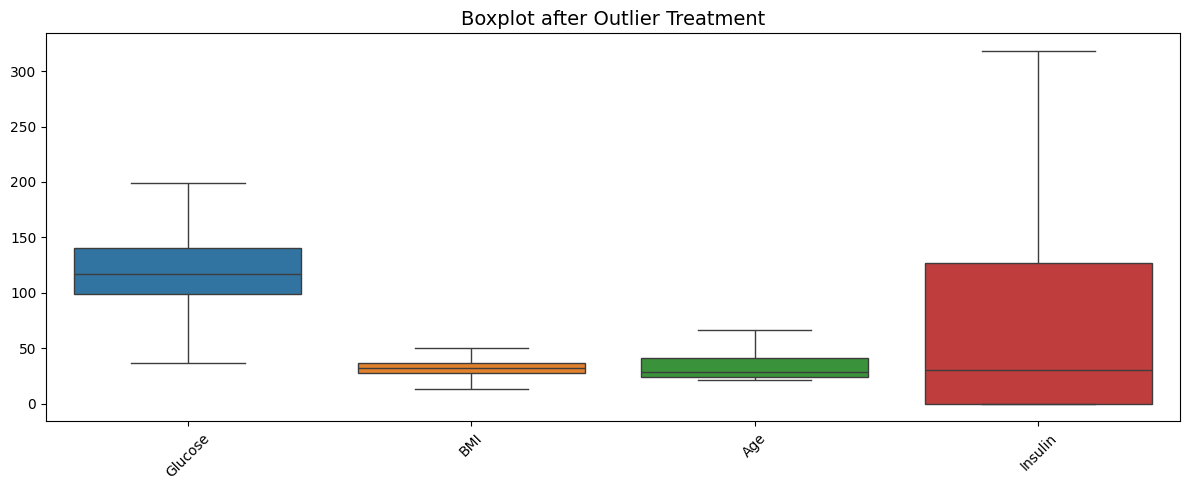

In [ ]:
assess_outliers(
    treated_data,
    title="Boxplot after Outlier Treatment"
)